In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Optional: better plot styles
sns.set(style="darkgrid")

# Step 2: Load the dataset (change filename as needed)
df = pd.read_csv("../data/BrentOilPrices.csv")  # Replace with your actual file name

# Step 3: Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Step 4: Sort by date and set as index
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Step 5: Check the basic structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


Summary Statistics and Missing Values

In [4]:
# Step 6: Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Step 7: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Summary Statistics:
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000

Missing Values:
Price    0
dtype: int64


Visualize Price Trends Over Time

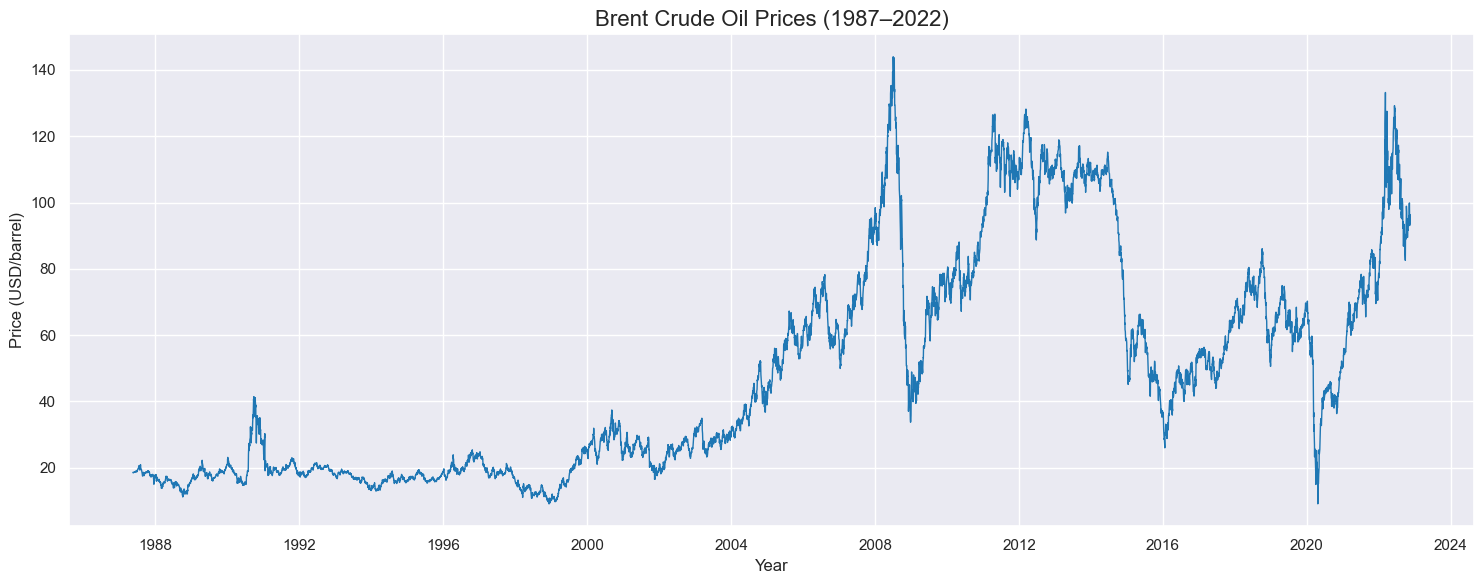

In [5]:
# Step 8: Line plot of oil prices
plt.figure(figsize=(15, 6))
plt.plot(df['Price'], color='tab:blue', linewidth=1)
plt.title("Brent Crude Oil Prices (1987–2022)", fontsize=16)
plt.ylabel("Price (USD/barrel)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


Analyze Volatility with a Rolling Window

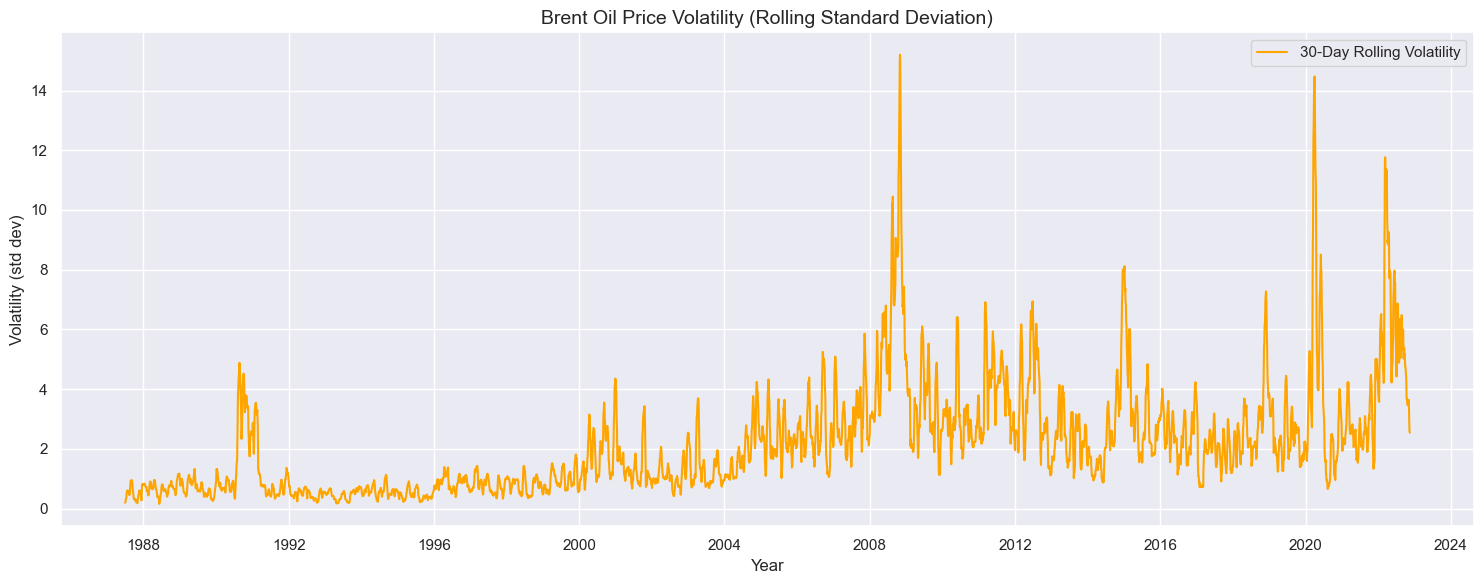

In [6]:
# Step 9: Rolling mean and volatility (30-day window)
df['Rolling_Mean'] = df['Price'].rolling(window=30).mean()
df['Rolling_Std'] = df['Price'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(15,6))
plt.plot(df['Rolling_Std'], color='orange', label='30-Day Rolling Volatility')
plt.title("Brent Oil Price Volatility (Rolling Standard Deviation)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Volatility (std dev)")
plt.legend()
plt.tight_layout()
plt.show()


Prepare the Event Dataset

In [4]:
event_data = [
    {"Date": "2011-02-01", "Event": "Arab Spring", "Description": "Political unrest in oil-producing countries led to supply concerns."},
    {"Date": "2014-06-01", "Event": "OPEC decision not to cut production", "Description": "Oil prices dropped due to oversupply."},
    {"Date": "2016-02-11", "Event": "Oil hits 13-year low", "Description": "Brent price falls below $30 due to global oversupply."},
    {"Date": "2016-11-30", "Event": "OPEC-Russia agreement to cut production", "Description": "First coordinated cut in 8 years."},
    {"Date": "2017-06-05", "Event": "Gulf diplomatic crisis", "Description": "Qatar embargo raised regional instability concerns."},
    {"Date": "2018-11-04", "Event": "US reimposes sanctions on Iran", "Description": "Reduced Iranian oil exports, raising prices."},
    {"Date": "2019-09-14", "Event": "Saudi Aramco drone attack", "Description": "5% of global supply halted; prices briefly spiked."},
    {"Date": "2020-03-01", "Event": "COVID-19 pandemic begins", "Description": "Sharp drop in oil demand worldwide."},
    {"Date": "2020-04-20", "Event": "WTI oil turns negative", "Description": "Extreme volatility during pandemic."},
    {"Date": "2021-03-23", "Event": "Suez Canal blockage", "Description": "Supply chain disruption caused price shock."},
    {"Date": "2021-07-18", "Event": "OPEC+ dispute over production quotas", "Description": "Temporary price volatility amid output uncertainty."},
    {"Date": "2022-02-24", "Event": "Russia invades Ukraine", "Description": "Supply concerns triggered price spikes."},
    {"Date": "2022-10-05", "Event": "OPEC+ production cut", "Description": "Cut of 2M barrels/day aimed at boosting prices."},
    {"Date": "2023-04-02", "Event": "Surprise OPEC+ production cuts", "Description": "Unanticipated cuts drive price increases."},
    {"Date": "2024-10-01", "Event": "Escalation of Israel–Iran tensions", "Description": "Heightened risk to regional oil infrastructure."}
]

events_df = pd.DataFrame(event_data)
events_df["Date"] = pd.to_datetime(events_df["Date"])

# Save to CSV (optional)
events_df.to_csv("../data/oil_price_events.csv", index=False)

